<a href="https://colab.research.google.com/github/begumtekoz/CIFAR_CNN/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Convolutional Neural Networks**

## Imports

In [ ]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


## Uploading the CIFAR10 Dataset and Preparing the Datasets

In this part, I'm going to upload Cifar10 dataset.Thanks to this code, cifar10 dataset is uploaded. The data, split between train and test sets. By using the print function, the size of training dataset is shown.

Train dataset Length: 50000
Test dataset Length:  10000

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler


# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
# percentage of training set to use as validation
valid_size = 0.1


import torch, torchvision
transform_train = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform_train)

test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform_test)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 32,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size = 32,
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 32,
    num_workers=num_workers)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


Train dataset is splitted 90/10. The length of validation dataset is 50000. The length of the new training dataset is 45000. The length of test dataset is 10000.

In [ ]:
print("The total observation in the train_data:", len(train_data))
print("The total observation in the train_data:", len(test_data))
print('Validation set is splitted 90/10')
print("The length of the new training dataset:", len(train_sampler))
print("The length of the validation dataset:", len(valid_sampler))

The total observation in the train_data: 50000
The total observation in the train_data: 10000
Validation set is splitted 90/10
The length of the new training dataset: 45000
The length of the validation dataset: 5000


# The Distribution of Classes in the Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Train Dataset**

Each class has 5000 observations and the number of class is 10.

Distribution of classes: 
 {'airplane': 5000, 'automobile': 5000, 'bird': 5000, 'cat': 5000, 'deer': 5000, 'dog': 5000, 'frog': 5000, 'horse': 5000, 'ship': 5000, 'truck': 5000}


Text(0.5, 1.0, 'Train Dataset Class Distribution')

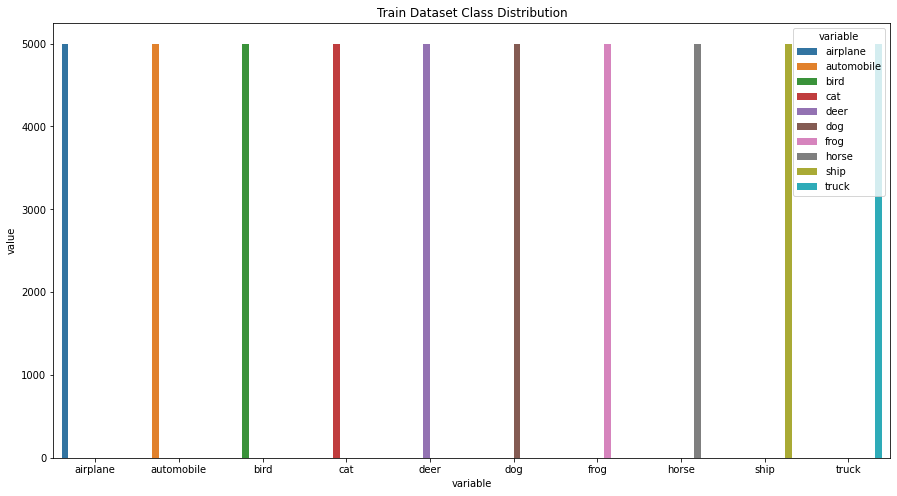

In [ ]:
idx2class = {v: k for k, v in train_data.class_to_idx.items()}
idx2class
def get_class_distribution(dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}

    for element in dataset_obj:
        y_lbl = element[1]
        y_lbl = idx2class[y_lbl]
        count_dict[y_lbl] += 1

    return count_dict
print("Distribution of classes: \n", get_class_distribution(train_data))
plt.figure(figsize=(15,8))
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(train_data)]).melt(), x = "variable", y="value", hue="variable").set_title('Train Dataset Class Distribution')

**Test Dataset**

Each class has 5000 observations and the number of class is 10.

Distribution of classes: 
 {'airplane': 1000, 'automobile': 1000, 'bird': 1000, 'cat': 1000, 'deer': 1000, 'dog': 1000, 'frog': 1000, 'horse': 1000, 'ship': 1000, 'truck': 1000}


Text(0.5, 1.0, 'Train Dataset Class Distribution')

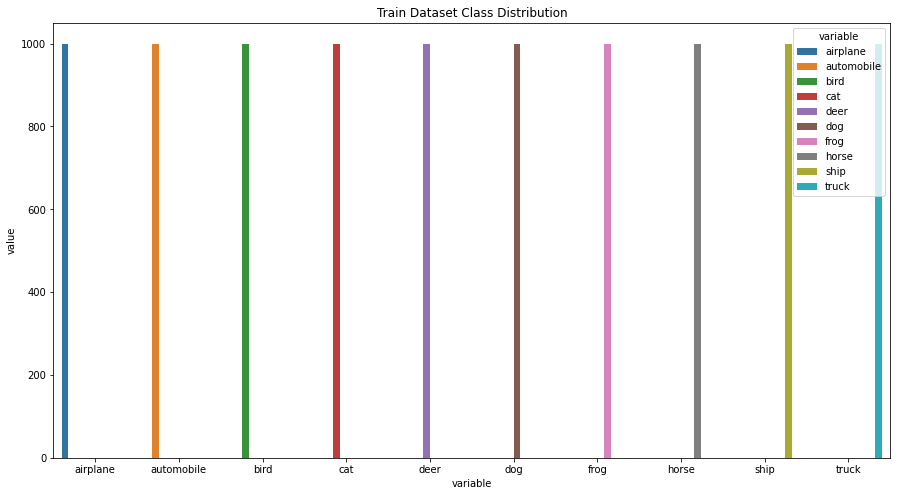

In [ ]:
idx2class1 = {v: k for k, v in test_data.class_to_idx.items()}
idx2class1
def get_class_distribution(dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}

    for element in dataset_obj:
        y_lbl = element[1]
        y_lbl = idx2class1[y_lbl]
        count_dict[y_lbl] += 1

    return count_dict
print("Distribution of classes: \n", get_class_distribution(test_data))
plt.figure(figsize=(15,8))
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(test_data)]).melt(), x = "variable", y="value", hue="variable").set_title('Train Dataset Class Distribution')

**Visualize one observation from the train dataset**

In [ ]:
# We can look at batches of images from the dataset using the make_grid method from torchvision
from torchvision.utils import make_grid

def show_batch(train_data):
    for images, labels in train_data:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


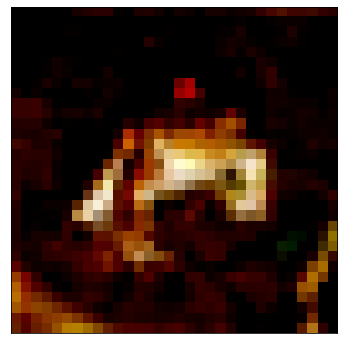

In [ ]:
show_batch(train_data)

## Create Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # fully connected layers
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        # dropout
        self.dropout = nn.Dropout(p=.5)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flattening
        x = x.view(-1, 64 * 4 * 4)
        # fully connected layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x




In [ ]:
test_convnet = ConvNet().to('cuda') #define model on Cuda
test_input = torch.randn(16, 3, 32, 32, device='cuda')
test_output = test_convnet(test_input)
print(test_output.shape)

torch.Size([16, 10])


## Define Loss Function

The network doesn't include a softmax activation at the output, Cross entropy loss is considered.

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

## Define Optimizer

Adam Optimizer with default parameter is considered.

In [ ]:
optimizer = torch.optim.Adam(test_convnet.parameters())
print(optimizer) #details of the Adam optimizer with default hyper parameters

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


## Define validation(test) loop

The function is decided, which takes a model and a dataloader and output accuracy. This function is used for validation and test dataloader.
Note: Make sure to toggle eval mode on at the beginning of the function and toggle it off at the end.
Note: When testing for accuracies, torch doesn't need to keep track of activations and gradients in the network.

In [ ]:
def check_accuracy(neuralnet, dataloader):
    neuralnet.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
    correct = 0.0
    total = 0.0
    for test_images, test_labels in dataloader:

        test_images, test_labels = test_images.cuda(), test_labels.cuda() ## Move batch to GPU
        images = test_images
        with torch.no_grad(): #turn off gradients
          pred = neuralnet(images) #get the predictions

        pred = torch.max(pred.data, 1)[1]
        total += test_labels.size(0)
        correct += (pred == test_labels).sum().item()

    accuracy = correct / total
    neuralnet.train() #toggle eval mod off at the end

    return accuracy


## Define Training Loop

In [ ]:
def train_one_epoch(neuralnet, dataloader, optimizer, loss_fn):



    for imgs_batch, labels_batch in dataloader:
        imgs_batch, labels_batch = imgs_batch.to("cuda"), labels_batch.to("cuda")


    ##  ## Pass inputs to the network
        class_scores = neuralnet (imgs_batch)

    ## Calculate loss using the loss_fn defined above
        loss = loss_fn(class_scores, labels_batch)


    ## Take an optimization step
        optimizer.zero_grad() #clear grads
        loss.backward() # #compute grads
        optimizer.step()  # take a gradient descent step using optimizer

## TRAIN

Train the network for at least 10 epochs. Measure both training and validation accuracy after each epoch, show it on a epoch/accuracy graph

In [ ]:
# Use the training function you defined above to train your network on training set.

training_accuracy_list = []
validation_accuracy_list = []

NUM_EPOCHS = 10 #at least 10

for epoch_no in range(NUM_EPOCHS):
    print(f'Epoch {epoch_no + 1}...')

    train_one_epoch(test_convnet, train_loader, optimizer, loss_fn)

    training_accuracy = check_accuracy(test_convnet, train_loader)
    print(f'Training   accuracy: {training_accuracy * 100 :.2f}%')
    validation_accuracy = check_accuracy(test_convnet, valid_loader)
    print(f'Validation accuracy: {validation_accuracy * 100 :.2f}%')

    training_accuracy_list.append(training_accuracy)
    validation_accuracy_list.append(validation_accuracy)

Epoch 1...
Training   accuracy: 56.43%
Validation accuracy: 54.94%
Epoch 2...
Training   accuracy: 64.20%
Validation accuracy: 62.28%
Epoch 3...
Training   accuracy: 69.45%
Validation accuracy: 66.38%
Epoch 4...
Training   accuracy: 74.77%
Validation accuracy: 70.84%
Epoch 5...
Training   accuracy: 76.14%
Validation accuracy: 71.12%
Epoch 6...
Training   accuracy: 78.46%
Validation accuracy: 71.26%
Epoch 7...
Training   accuracy: 79.75%
Validation accuracy: 72.42%
Epoch 8...
Training   accuracy: 81.28%
Validation accuracy: 72.60%
Epoch 9...
Training   accuracy: 82.99%
Validation accuracy: 72.84%
Epoch 10...
Training   accuracy: 83.51%
Validation accuracy: 73.64%


## Plot

Text(0, 0.5, 'Accuracy')

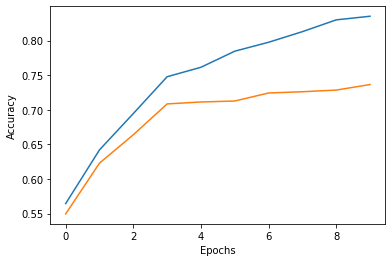

In [ ]:
plt.plot(training_accuracy_list)
plt.plot(validation_accuracy_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

##TEST

Test the network on the test set

In [ ]:
# Use the test function you defined above to test your network before training
test_accuracy = check_accuracy(test_convnet, test_loader)
print(f'Test accuracy after training: {test_accuracy * 100 :.2f}%')

Test accuracy after training: 73.69%


As seen our test accuracy is above 71.85%, so it is considered as a successful model.

## Save the network

In [ ]:
print(test_convnet) #model details

ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


As written, I've saved the parameters of the traine

In [ ]:
print("The state dict keys: \n\n", test_convnet.state_dict().keys()) #state dict keys

The state dict keys: 

 odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])
